# Part I - (Prosper Loan Data Exploration)
## by (Mirabel Sam)

## Introduction
This document explores a dataset containing information on borrrowed money by Prosper Loans.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
2               HR    36               Completed  2009-12-17 00:00:00   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
0           0.16516        0.1580       0.1380  ...         -133.18   
1           0.12016        0.0920       0.0820  ...            0.00   
2           0.28269        0.2750       0.2400  ...          -24.20   
3           0.12528        0.0974       0.0874  ...         -108.01   
4           0.24614        0.2085       0.1985  ...          -60.27   
...             ...           ...          ...  ...             ...   
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                     0.0                    0.0                  0.0   
1                     0.0                    0.0                  0.0   
2                     0.0                    0.0                  0.0   
3                     0.0                    0.0                  0.0   
4                     0.0                    0.0                  0.0   
...                   ...                    ...                  ...   
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                  0.0            1.0                0   
1                                  0.0            1.0                0   
2                                  0.0            1.0                0   
3                                  0.0            1.0                0   
4                                  0.0            1.0                0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### What is the structure of your dataset?

A total of 113937 loan transactions had been made as captured in the dataset with 81 features. Most of the variables are numerical with a few being categorical. Categorical variables in the dataset include:
Loan status: The current status of the loans. Cancelled, Charged off, Completed, Current, Defaulted, Final Payment In Progress and Past Due.
Employment Status: of the borrower; 
Also Prosper score ranging from 1-10 is a numerical variable used to score the risk of loan transactions. The higher the number, the lower the risk.

### What is/are the main feature(s) of interest in your dataset?

I am interested in knowing what features affect the loan transactions in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The features 'Term', 'LoanStatus', 'EmploymentStatus',  'StatedMonthlyIncome', 'TotalProsperLoans', 'OnTimeProsperPayments', 'LoanOriginalAmount' and 'ProsperScore' will be useful in my  data exploration.  


In [5]:
df_focus=df[['Term', 'LoanStatus', 'EmploymentStatus',  'StatedMonthlyIncome', 'TotalProsperLoans', 'OnTimeProsperPayments', 'LoanOriginalAmount', 'ProsperScore' ]]
df_focus.head()

Term LoanStatus EmploymentStatus  StatedMonthlyIncome  TotalProsperLoans  \
0    36  Completed    Self-employed          3083.333333                NaN   
1    36    Current         Employed          6125.000000                NaN   
2    36  Completed    Not available          2083.333333                NaN   
3    36    Current         Employed          2875.000000                NaN   
4    36    Current         Employed          9583.333333                1.0   

   OnTimeProsperPayments  LoanOriginalAmount  ProsperScore  
0                    NaN                9425           NaN  
1                    NaN               10000           7.0  
2                    NaN                3001           NaN  
3                    NaN               10000           9.0  
4                   11.0               15000           4.0

## Univariate Exploration

In this exploration, I will be looking at the distribution of individual variables. 

In [6]:
def countplot(data, x, title, xlabel, ylabel):
    sb.countplot(data=data, x=x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    

1.What is the employment status of those who borrowed the money?

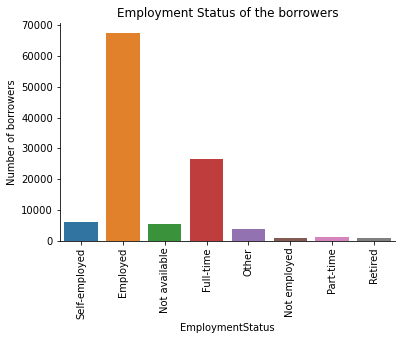

In [7]:
countplot(data=df_focus, x='EmploymentStatus', title="Employment Status of the borrowers", xlabel="EmploymentStatus", ylabel="Number of borrowers")

plt.xticks(rotation=90)
sb.despine()

plt.show()

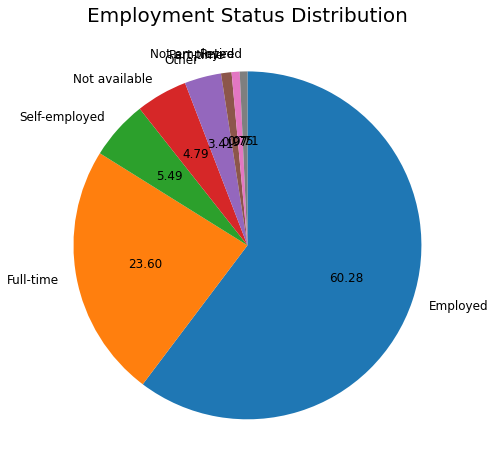

In [8]:
EmploymentStatus_val = df_focus['EmploymentStatus'].value_counts()
plt.figure(figsize=[10,8])

plt.pie(EmploymentStatus_val, startangle = 90, labels=EmploymentStatus_val.index, autopct='%.2f', counterclock = False, textprops={'fontsize': 12});
plt.title('Employment Status Distribution', fontsize=20)
plt.show()


2.How risky are the loan transactions made?

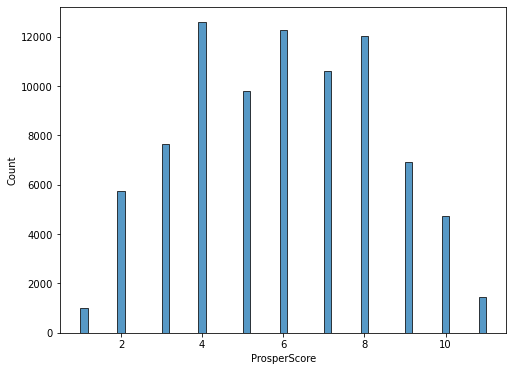

In [9]:
plt.figure(figsize=[8,6])

sb.histplot(df_focus, x='ProsperScore');

What is the highest amount of loan given out and how many people that amount?

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='Count'>

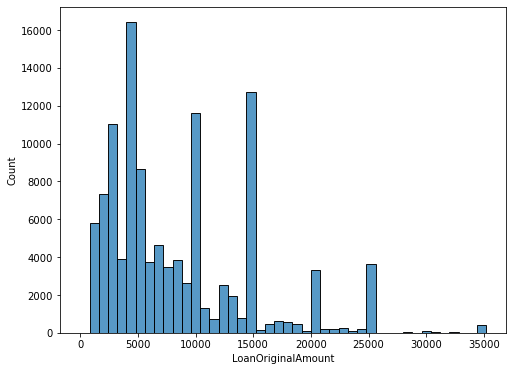

In [10]:
plt.figure(figsize=[8,6])

binsize = 800
bins = np.arange(0, df_focus.LoanOriginalAmount.max() + binsize, binsize)
sb.histplot(df_focus, x='LoanOriginalAmount' , bins=bins)

What is the most common duration of loan payments?

In [11]:
plt.figure(figsize=[8,6])

sb.histplot(df_focus, x='Term')

<AxesSubplot:xlabel='Term', ylabel='Count'>

How many people have been able to complete payment of their loans?

In [12]:
countplot(data=df_focus, x='LoanStatus', title='Complete Payments', xlabel='Loan Status', ylabel='Number of borrowers');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

How many times can customers take the loan?

In [13]:
countplot(data=df_focus, x='TotalProsperLoans', title='Distribution of number of times of taking loans', xlabel='Number of times', ylabel='Number of borrowers')
sb.despine()

plt.show()

The highest number of borrowers are employed followed by full time employed, self employed and then other employment status. Those whose employment status are not determined follow closely while those who are not employed, part-time employed and retired follow with the lowest numbers. Most of the loans given out have a Prosper score of 2, 4, 6 and 8 with the other ratings following closely. This implies the risk of the loan transaction is unpredictable. The amount given out regularly as loan is 5000 while the highest amount given out as loan is 35,000. Loan terms are mostly between 36 and 38 months and also between 57 and 60 months. A large group (more than 50,000) of borrowers currently have loans to pay off while about 3000 people have completed their loans. About 14000 people are taking loan for the first time and about 4000 people are taking loan for the second time. Some borrowers have taken loan for as many as five times. 

## Bivariate Exploration

In Bivariate exploration, I will investigate the relationship between pairs of variables. 

How does the employment status affect on time payments?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Self-employed'),
  Text(1, 0, 'Employed'),
  Text(2, 0, 'Not available'),
  Text(3, 0, 'Full-time'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Not employed'),
  Text(6, 0, 'Part-time'),
  Text(7, 0, 'Retired')])

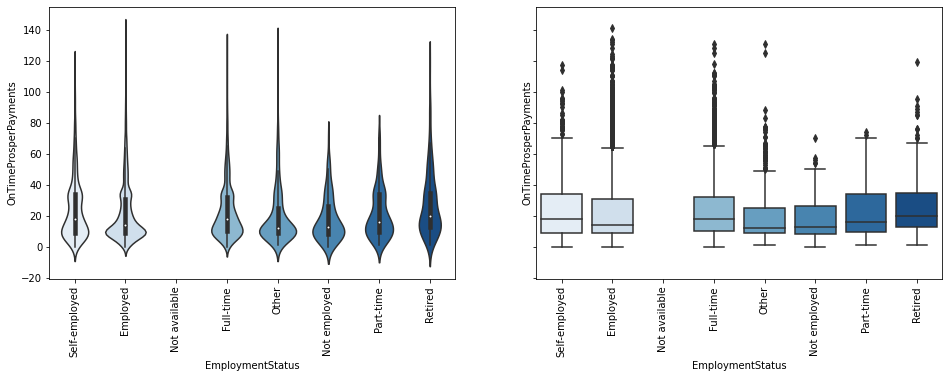

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

plt.subplot(1, 2, 1)
sb.violinplot(data=df_focus, x='EmploymentStatus', y='OnTimeProsperPayments', palette='Blues')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sb.boxplot(data=df_focus, x='EmploymentStatus', y='OnTimeProsperPayments', palette='Blues')
plt.xticks(rotation=90)

What are the ratings of the loan transactions?

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

plt.subplot(1, 2, 1)
sb.violinplot(data=df_focus, x='LoanStatus', y='ProsperScore', palette='Blues')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sb.boxplot(data=df_focus, x='LoanStatus', y='ProsperScore', palette='Blues')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

Does the amount borrowed depend on the monthly income of borrower?

Text(0, 0.5, 'Amount borrowed')

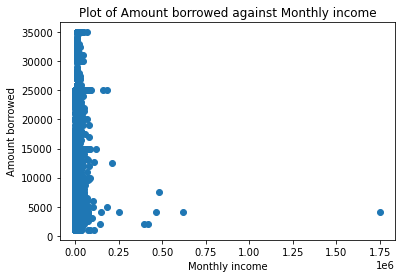

In [16]:
plt.scatter(data = df_focus, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount');
plt.title('Plot of Amount borrowed against Monthly income')
plt.xlabel('Monthly income')
plt.ylabel('Amount borrowed')

In [17]:
def plot_hist2d(data,  x,  y, title, xlabel, ylabel):
    plt.hist2d(data = data, x = x, y = y, cmin=0.5, cmap='viridis_r')
    plt.title(title)
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel)

Does the loan term depend on the amount borrowed?

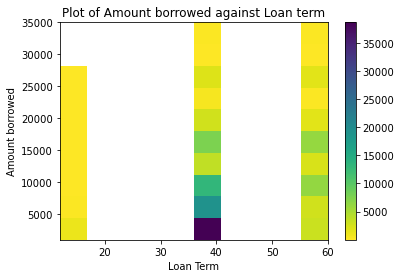

In [18]:
plot_hist2d(data = df_focus, x = 'Term', y ='LoanOriginalAmount', title='Plot of Amount borrowed against Loan term', xlabel='Loan Term', ylabel='Amount borrowed')
plt.colorbar()

Does the loan term depend on the monthly income?

In [19]:
plot_hist2d(data = df_focus, x ='Term', y='StatedMonthlyIncome', title='Plot of Monthly income against Loan term', xlabel='Loan Term', ylabel='Monthly Income')
plt.colorbar()

In [20]:
select_numeric_var = df_focus[['Term','StatedMonthlyIncome','TotalProsperLoans', 'OnTimeProsperPayments', 'LoanOriginalAmount', 'ProsperScore']]
samples = np.random.choice(df_focus.shape[0], 500, replace = False)
df_focus_samp = df_focus.loc[samples,:]

m = sb.PairGrid(data = df_focus_samp, vars = select_numeric_var, height=3)
m= m.map_diag(plt.hist, bins = 20);
m.map_offdiag(plt.scatter)

The employed people pay their loans on time. Loans completed have higher ratings that is low risks followed by loans whose final payments are in progress for their Prosper score. The amount given out as loan hardly depends on the monthly income of the borrowers. Loan term also hardly depends on the monthly income of the borrowers. 

## Multivariate Exploration
 I will carry out Multivariate exploration in order to further ivestigate the relationship between variables. 

How does the employment status affect payment of loan?

In [21]:
plt.figure(figsize=[12, 6])
sb.barplot(x='LoanStatus', y='LoanOriginalAmount', data=df_focus, hue='EmploymentStatus');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

How fast have borrowers been able to pay their loans based on their monthly income? 

In [22]:
m = sb.FacetGrid(data = df_focus, hue = 'LoanStatus', height=8, aspect=1.5)
m.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome')
m.add_legend()

Those who have completed their loans borrowed not more than 7000. Those who defaulted their loans borrowed between 6000 and 12,000 with most of these people being self employed. Those whose loans are past due borrowed between 6000 and 14,000 and most of these people have part time employment. People do not consider their monthly income before going in for loans. The highest amount of loans are borrowed by part-time employed people and their loans are past due.  

## Conclusions
Loans can be given out regardless of the  employment status or monthly income of the borrower. Those who borrow lower amounts are able to complete payment of their loans. You can go in for loans more than once. Loan terms are mostly between 36 and 38 months and 57 and 60 months. 